In [ ]:
import matplotlib.pyplot as plt
import string 
import math
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


# Caesar Wheel

In [ ]:
text = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU " +\
       "BROJZK MOLTROE."
text

'PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE.'

In [ ]:
def letterCount(sentence):
  d = {}
  for letter in sentence:
    if letter.isalpha():
      d[letter] = d.get(letter, 0) + 1
  return d

lCount = letterCount(text)
lCount 

{'A': 3,
 'B': 1,
 'C': 2,
 'D': 2,
 'E': 1,
 'F': 6,
 'I': 1,
 'J': 2,
 'K': 3,
 'L': 4,
 'M': 1,
 'O': 6,
 'P': 7,
 'Q': 5,
 'R': 6,
 'S': 3,
 'T': 1,
 'U': 1,
 'X': 1,
 'Z': 3}

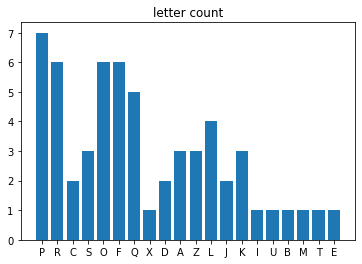

In [ ]:
plt.bar(range(len(lCount)),list(lCount.values()))
plt.xticks(range(len(lCount)),list(lCount.keys()))
plt.title("letter count")
plt.show()

In [ ]:
len(lCount)

20

In [ ]:
def getAscii(keyLetter, ogLetter):
  keyAscii = ord(keyLetter) - 97
  ogAscii = ord(ogLetter)
  newAscii = (ogAscii + keyAscii) % 123
  if newAscii < 97: 
    newAscii += 97
  return chr(newAscii)

def genWheel(keyLetter):
  d = {}
  for i in range(97,123):
    d[chr(i)] = getAscii(keyLetter,chr(i))
  return d

def checkEndOfWord(word):
  return (
      word.endswith("s") or 
      word.endswith("ing") or 
      word.endswith("es") or 
      word.endswith("ed")
  )

def caesarCipher(code):
  ws = code.lower().split(" ") 
  for i in range(97,123):
    wheel = genWheel(chr(i))
    out = ""
    found = True
    for word in ws:
      letters = list(map(lambda x: wheel.get(x,x),list(word)))
      outWord = "".join(letters)
      if outWord in words.words():
        out += outWord + " "
      elif checkEndOfWord(outWord) and \
        (outWord[:-1] in words.words() or
         outWord[:-2] in words.words() or
         outWord[:-3] in words.words()):
        out += outWord + " "
      else:
        found = False 
        break
    if found: 
      return out.strip()
  return None 

# caesarCipher("QEB NRFZH YOLTK CLU GRJMP LSBO QEB IXWV ALD")
# the quick brown fox jumps over the lazy dog

In [ ]:
caesarCipher("QEB NRFZH YOLTK CLU GRJMP LSBO QEB IXWV ALD")

'the quick brown fox jumps over the lazy dog'

# Vigenere Cipher

In [ ]:
# asciiA = 97
# chr(asciiA)
ord("z")

122

In [ ]:
list(zip("abc", "bcd"))

[('a', 'b'), ('b', 'c'), ('c', 'd')]

In [ ]:
def getAscii(keyLetter, ogLetter):
  keyAscii = ord(keyLetter) - 97
  ogAscii = ord(ogLetter)
  newAscii = (ogAscii + keyAscii) % 123
  if newAscii < 97: 
    newAscii += 97
  return chr(newAscii)


def vigenere(key, og):
  key = key.lower()
  og = og.lower()
  # extend key if key lenght is not equal
  if len(key) < len(og):
    key += key*math.ceil(len(og)/len(key))
    key = key[:len(og)]
  
  # ciphering
  ciphered = ""
  for (keyLetter,ogLetter) in list(zip(key,og)):
    ciphered += getAscii(keyLetter,ogLetter)
  return ciphered


In [ ]:
vigenere("lucky", "computing")
# for i in range(26):
#   print(getAscii("d",chr(97+i)))

'niozsecpq'

# Block cipher on image

In [ ]:
import cv2
import matplotlib.pyplot as plt


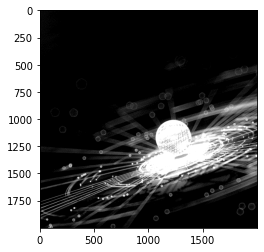

In [ ]:
og = cv2.imread("ball.pbm",0)
plt.imshow(og,cmap='gray')
plt.show()

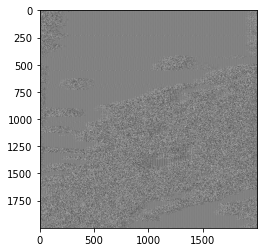

In [ ]:
ecb = cv2.imread("baw.jpg",0)
plt.imshow(ecb,cmap='gray')
plt.show()

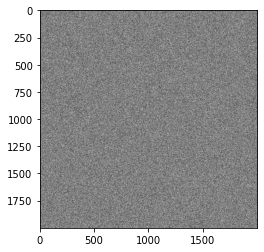

In [ ]:
cbc = cv2.imread("ball_cbc.pbm",0)
plt.imshow(cbc,cmap='gray')
plt.show()

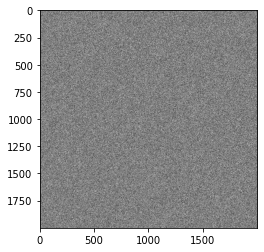

In [ ]:
cfb = cv2.imread("cfb.pbm",0)
plt.imshow(cfb,cmap='gray')
plt.show()

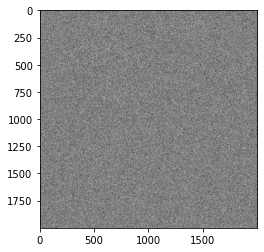

In [ ]:
cbc_iv = cv2.imread("cbc_iv.pbm",0)
plt.imshow(cbc_iv,cmap='gray')
plt.show()

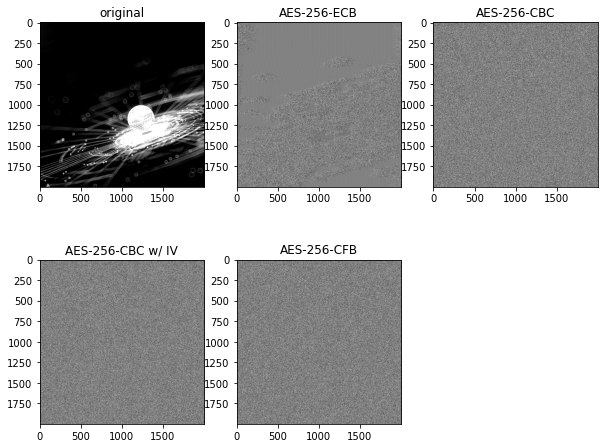

In [ ]:
# plt.figure(figsize=(10,8))
fig,ax=plt.subplots(2,3,figsize=(10,8))

ax[0][0].imshow(og,cmap='gray')
ax[0][0].set_title("original")

ax[0][1].imshow(ecb,cmap='gray')
ax[0][1].set_title("AES-256-ECB")

ax[0][2].imshow(cbc,cmap='gray')
ax[0][2].set_title("AES-256-CBC")

ax[1][0].imshow(cbc_iv,cmap='gray')
ax[1][0].set_title("AES-256-CBC w/ IV")

ax[1][1].imshow(cfb,cmap='gray')
ax[1][1].set_title("AES-256-CFB")

fig.delaxes(ax[1][2])

plt.show()